In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /LAB 02/Amazon Customer Behavior Survey.csv")
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [ ]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [ ]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [ ]:
irrelevant_features = ['Timestamp', 'Customer_Reviews_Importance', 'Product_Search_Method']
df_encoded = df_encoded.drop(columns=irrelevant_features)

In [ ]:
# Binning for age into age groups
bins = [18, 25, 35, 45, np.inf]
labels = ['18-25', '26-35', '36-45', '46+']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)

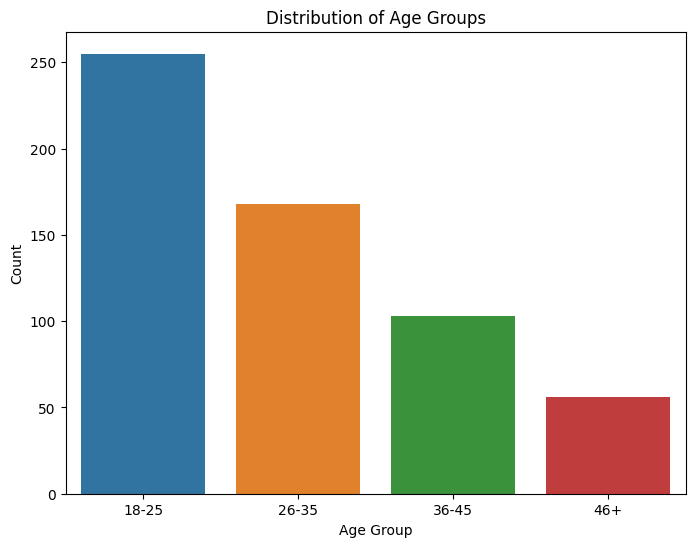

In [ ]:
# Bar plot for age groups distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_Group')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Purchase_Frequency']
df_encoded = df.copy()  # Create a copy of the DataFrame
for col in categorical_columns:
    df_encoded[col + '_encoded'] = label_encoder.fit_transform(df[col])

In [ ]:
# Explore relationship between age and product rating - Covariance matrix
cov_matrix = df_encoded[['age', 'Rating_Accuracy ']].cov()

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Timestamp                               602 non-null    object  
 1   age                                     602 non-null    int64   
 2   Gender                                  602 non-null    object  
 3   Purchase_Frequency                      602 non-null    object  
 4   Purchase_Categories                     602 non-null    object  
 5   Personalized_Recommendation_Frequency   602 non-null    object  
 6   Browsing_Frequency                      602 non-null    object  
 7   Product_Search_Method                   600 non-null    object  
 8   Search_Result_Exploration               602 non-null    object  
 9   Customer_Reviews_Importance             602 non-null    int64   
 10  Add_to_Cart_Browsing                    602 non-nu

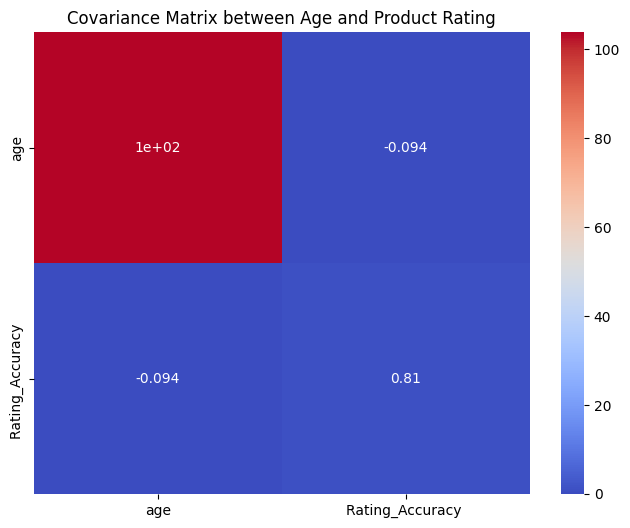

In [ ]:
# Visualize covariance matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix between Age and Product Rating')
plt.show()

In [ ]:
# Association between gender and repeat purchase - Chi-squared test
contingency_table = pd.crosstab(df_encoded['Gender_encoded'], df_encoded['Purchase_Frequency_encoded'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-squared p-value:', p)

Chi-squared p-value: 0.0007025216973103722


<Figure size 800x600 with 0 Axes>

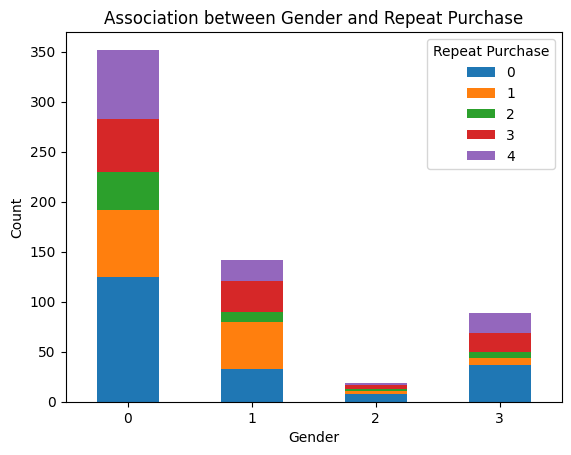

In [ ]:
# Stacked bar plot to demonstrate association between gender and repeat purchase
plt.figure(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Association between Gender and Repeat Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Repeat Purchase')
plt.show()

In [ ]:
# Compare product rating on repeat vs. no repeat purchase - Independent T-test
repeat_rating = df_encoded[df_encoded['Purchase_Frequency_encoded'] == 1]['Rating_Accuracy ']
no_repeat_rating = df_encoded[df_encoded['Purchase_Frequency_encoded'] == 0]['Rating_Accuracy ']
t_statistic, p_value = ttest_ind(repeat_rating, no_repeat_rating)
print('T-test p-value:', p_value)

T-test p-value: 0.23235665508991918


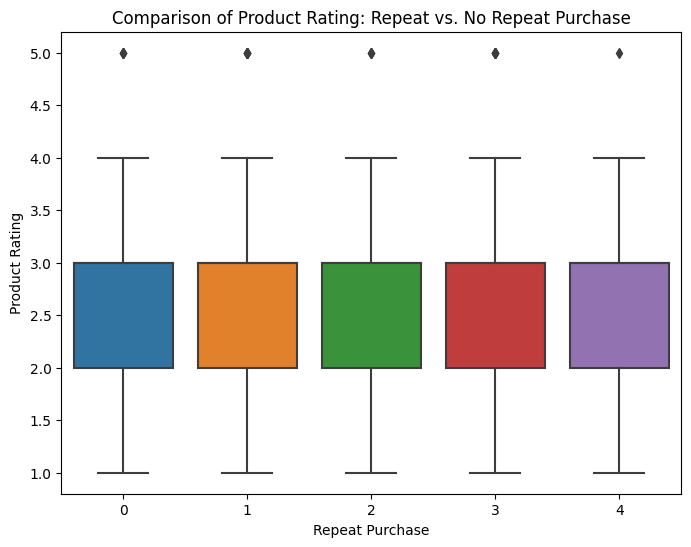

In [ ]:
# Visualize comparison using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_encoded, x='Purchase_Frequency_encoded', y='Rating_Accuracy ')
plt.title('Comparison of Product Rating: Repeat vs. No Repeat Purchase')
plt.xlabel('Repeat Purchase')
plt.ylabel('Product Rating')
plt.show()